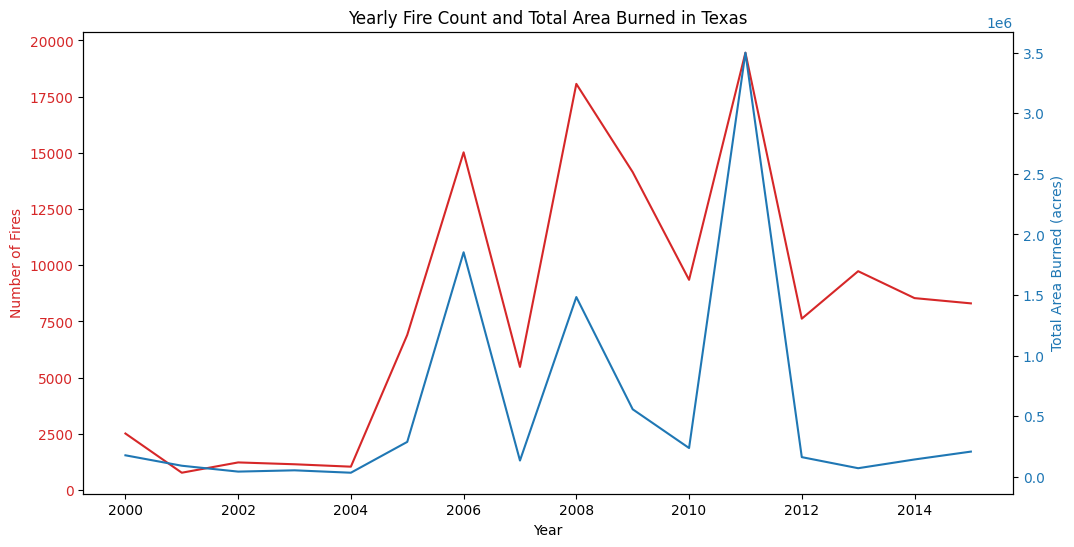

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sc

# Load fire data
df = pd.read_csv('dataset/texas_fires_drought.csv')

df['DISCOVERY_DATE_NEW'] = pd.to_datetime(df['DISCOVERY_DATE_NEW'])

df['Month'] = df['DISCOVERY_DATE_NEW'].dt.month
df['Year'] = df['DISCOVERY_DATE_NEW'].dt.year

yearly_fires = df.groupby('Year').size().reset_index(name='Fire_Count')
yearly_area = df.groupby('Year')['FIRE_SIZE'].sum().reset_index(name='Total_Area')
monthly_fires = df.groupby(['Year', 'Month']).size().reset_index(name='Fire_Count')
monthly_area = df.groupby(['Year', 'Month'])['FIRE_SIZE'].sum().reset_index(name='Total_Area')

fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Fires', color=color)
ax1.plot(yearly_fires['Year'], yearly_fires['Fire_Count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Total Area Burned (acres)', color=color)
ax2.plot(yearly_area['Year'], yearly_area['Total_Area'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Yearly Fire Count and Total Area Burned in Texas')
plt.show()


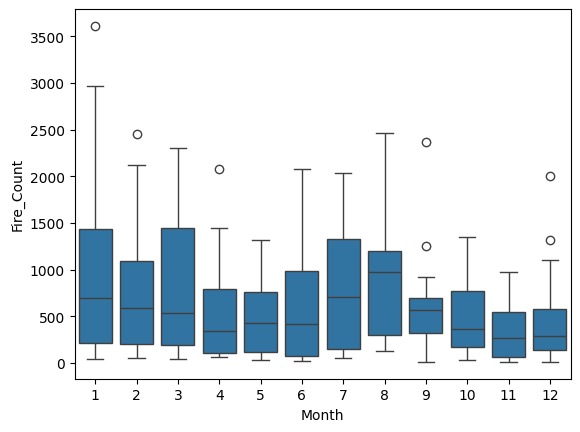

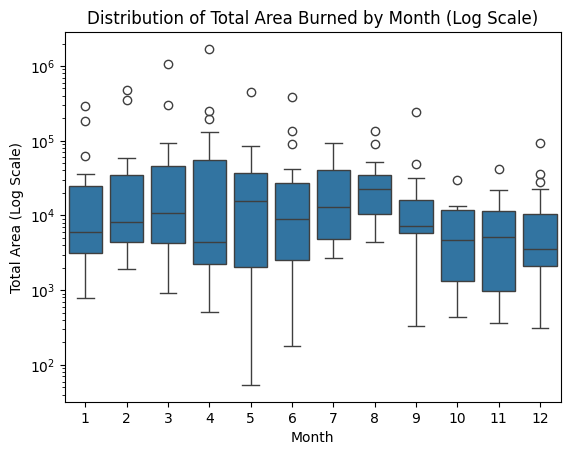

In [72]:
sns.boxplot(data=monthly_fires, x='Month', y='Fire_Count')

plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=monthly_area, x='Month', y='Total_Area')

plt.yscale('log')

plt.title('Distribution of Total Area Burned by Month (Log Scale)')
plt.xlabel('Month')
plt.ylabel('Total Area (Log Scale)')

plt.show()


In [73]:
texas_fires_with_drought_and_fips = pd.read_csv('dataset/texas_fires_drought.csv')

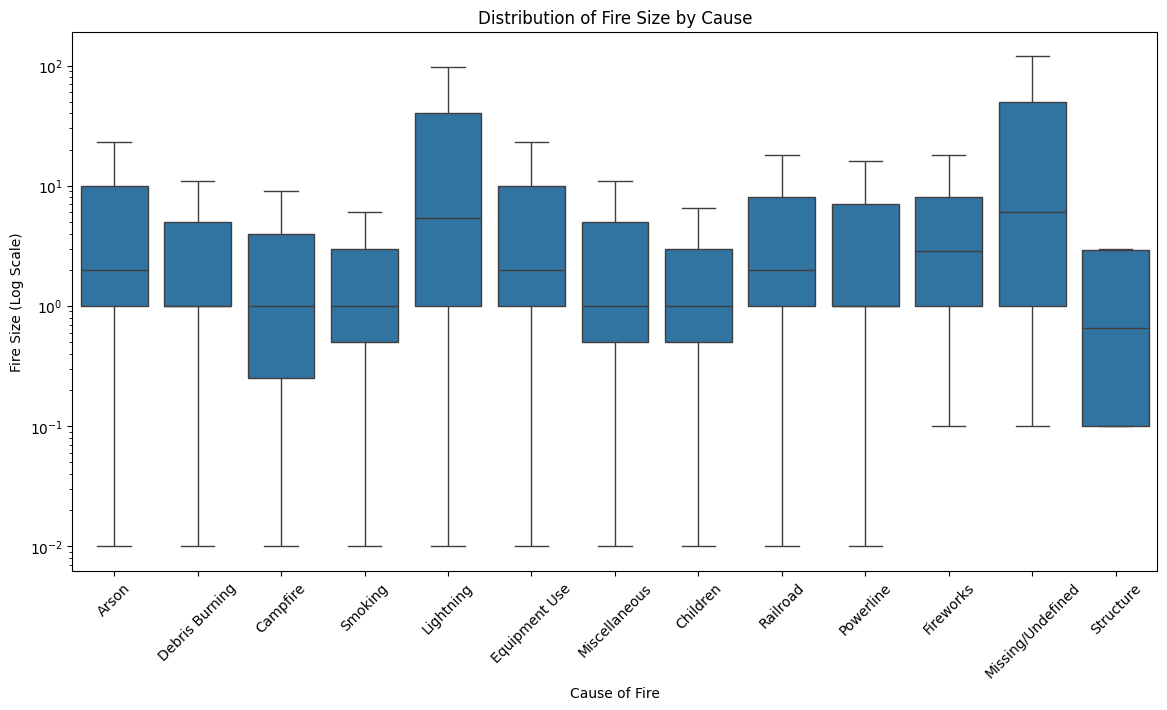

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of fire size by cause
plt.figure(figsize=(14, 7))
sns.boxplot(data=texas_fires_with_drought_and_fips, x='STAT_CAUSE_DESCR', y='FIRE_SIZE', showfliers=False)
plt.yscale('log')  # Use log scale for fire size
plt.xticks(rotation=45)
plt.title('Distribution of Fire Size by Cause')
plt.xlabel('Cause of Fire')
plt.ylabel('Fire Size (Log Scale)')
plt.show()


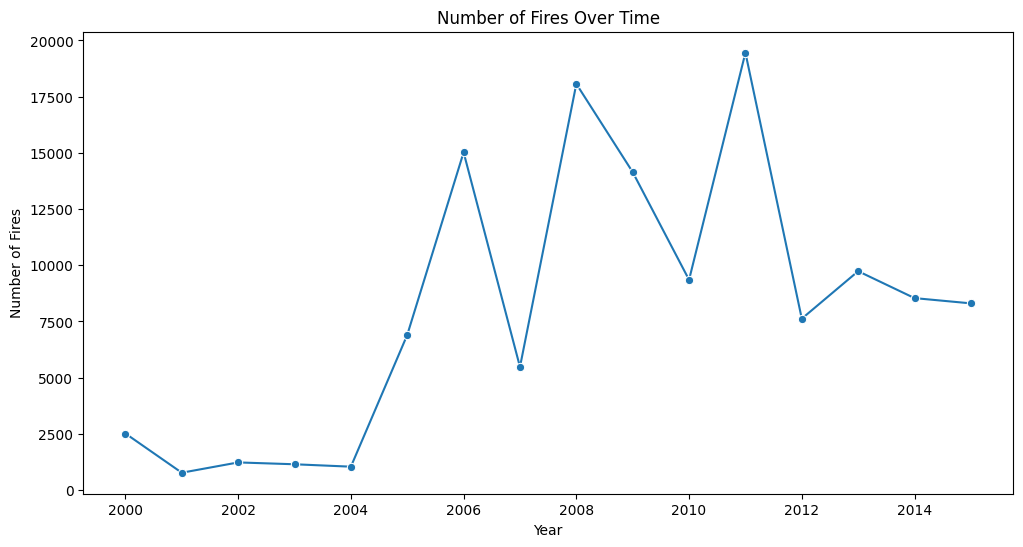

In [75]:
# Group by year and count fires
yearly_fires = texas_fires_with_drought_and_fips.groupby('FIRE_YEAR').size().reset_index(name='Fire_Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_fires, x='FIRE_YEAR', y='Fire_Count', marker='o')
plt.title('Number of Fires Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.show()


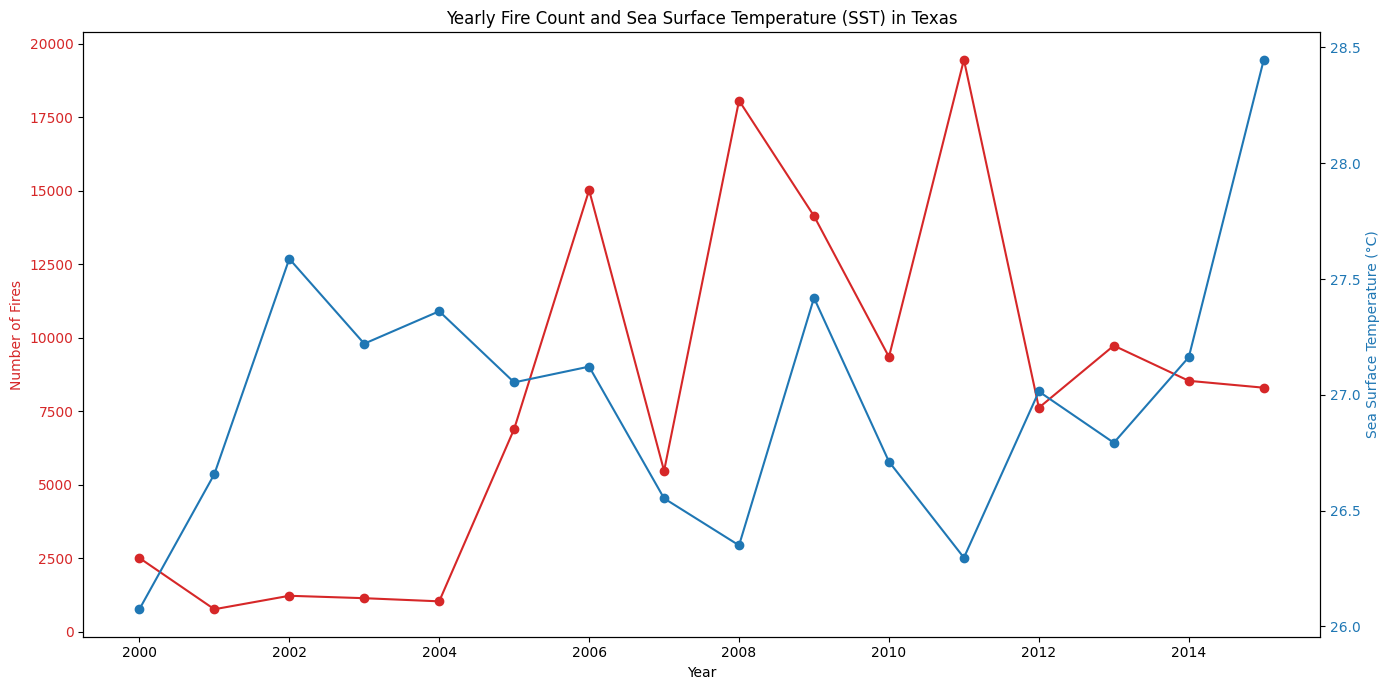

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

nino_data = pd.read_csv('dataset/nino_sst.csv')

fire_data = texas_fires_with_drought_and_fips.copy()

fire_data['DISCOVERY_DATE_NEW'] = pd.to_datetime(fire_data['DISCOVERY_DATE_NEW'])
fire_data['Year'] = fire_data['DISCOVERY_DATE_NEW'].dt.year

yearly_fires = fire_data.groupby('Year').size().reset_index(name='Fire_Count')
yearly_area = fire_data.groupby('Year')['FIRE_SIZE'].sum().reset_index(name='Total_Area')
fire_data = fire_data.drop(fire_data[fire_data['STAT_CAUSE_DESCR'] == 'Debris Burning'].index)

nino_data['Year'] = pd.to_datetime(nino_data['Date']).dt.year	
sst = nino_data.groupby('Year')['Temperature'].mean()
fig, ax1 = plt.subplots(figsize=(14, 7))
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Fires', color=color)
ax1.plot(yearly_fires['Year'], yearly_fires['Fire_Count'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Sea Surface Temperature (°C)', color=color)
ax2.plot(sst, marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Yearly Fire Count and Sea Surface Temperature (SST) in Texas')
plt.tight_layout()
plt.show()


Pearson Correlation: 0.41 (p-value: 0.114)


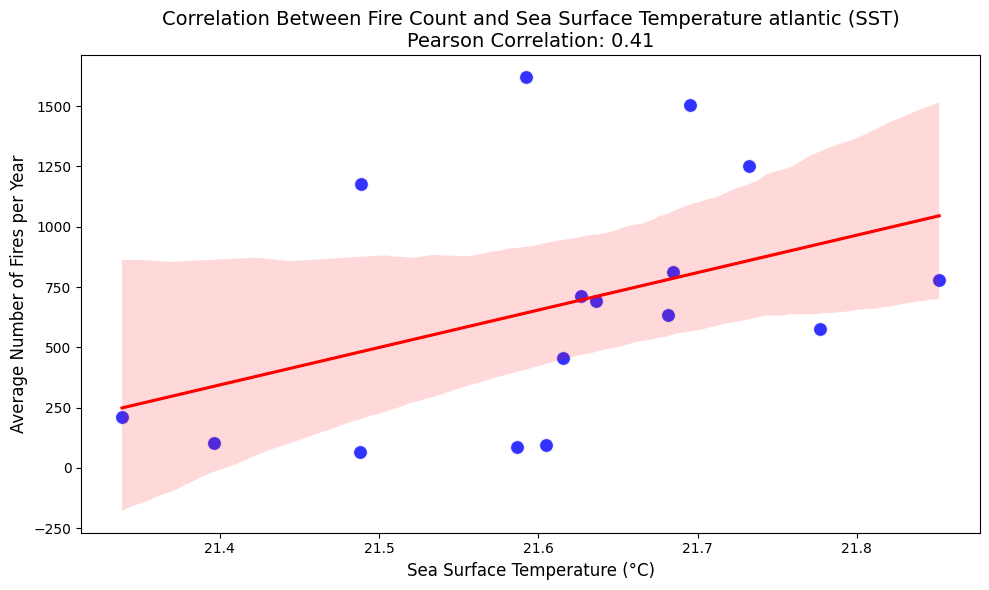

Pearson Correlation: -0.21 (p-value: 0.446)


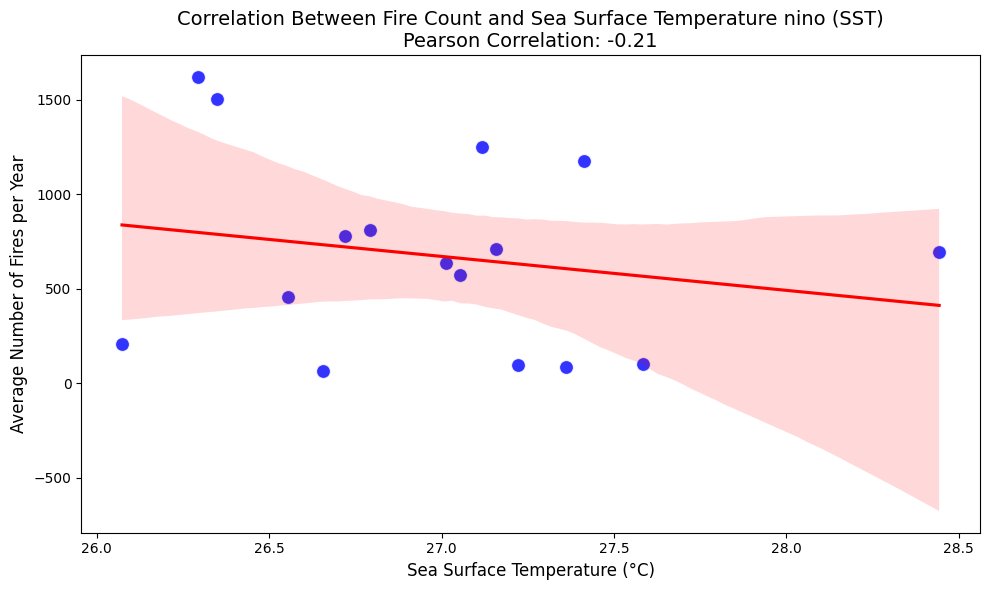

Pearson Correlation: -0.10 (p-value: 0.723)


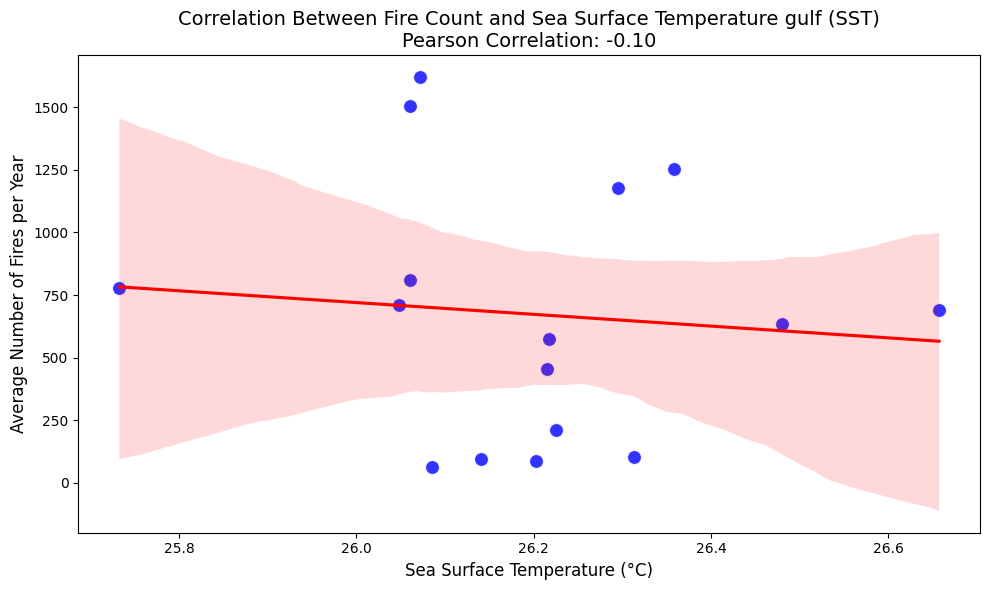

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

fire_data = texas_fires_with_drought_and_fips.copy()
fire_data['DISCOVERY_DATE_NEW'] = pd.to_datetime(fire_data['DISCOVERY_DATE_NEW'])
fire_data['Month'] = fire_data['DISCOVERY_DATE_NEW'].dt.month
fire_data['Year'] = fire_data['DISCOVERY_DATE_NEW'].dt.year
monthly_fires = fire_data.groupby(['Year', 'Month']).size().reset_index(name='Fire_Count')

nino_data = pd.read_csv('dataset/atlantic_sst.csv')
nino_data[['Year', 'Month']] = nino_data['Date'].str.split('-', expand=True)[[0, 1]].astype(int)

monthly_sst = nino_data.groupby(['Year', 'Month'])['Temperature'].mean().reset_index()
monthly_data = pd.merge(monthly_fires, monthly_sst, on=['Year', 'Month'])
yearly_data = monthly_data.groupby('Year').agg({'Fire_Count': 'mean', 'Temperature': 'mean'}).reset_index()

corr, p_value = pearsonr(yearly_data['Temperature'], yearly_data['Fire_Count'])
print(f"Pearson Correlation: {corr:.2f} (p-value: {p_value:.3f})")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=yearly_data, x='Temperature', y='Fire_Count', s=100, color='blue', alpha=0.8)
sns.regplot(data=yearly_data, x='Temperature', y='Fire_Count', scatter=False, color='red', line_kws={"label": "Trend Line"})
plt.title(f'Correlation Between Fire Count and Sea Surface Temperature atlantic (SST)\nPearson Correlation: {corr:.2f}', fontsize=14)
plt.xlabel('Sea Surface Temperature (°C)', fontsize=12)
plt.ylabel('Average Number of Fires per Year', fontsize=12)
plt.tight_layout()
plt.show()
fire_data = texas_fires_with_drought_and_fips.copy()
fire_data['DISCOVERY_DATE_NEW'] = pd.to_datetime(fire_data['DISCOVERY_DATE_NEW'])

fire_data['Month'] = fire_data['DISCOVERY_DATE_NEW'].dt.month
fire_data['Year'] = fire_data['DISCOVERY_DATE_NEW'].dt.year
monthly_fires = fire_data.groupby(['Year', 'Month']).size().reset_index(name='Fire_Count')

nino_data = pd.read_csv('dataset/nino_sst.csv')
nino_data[['Year', 'Month']] = nino_data['Date'].str.split('-', expand=True)[[0, 1]].astype(int)

monthly_sst = nino_data.groupby(['Year', 'Month'])['Temperature'].mean().reset_index()
monthly_data = pd.merge(monthly_fires, monthly_sst, on=['Year', 'Month'])
yearly_data = monthly_data.groupby('Year').agg({'Fire_Count': 'mean', 'Temperature': 'mean'}).reset_index()
corr, p_value = pearsonr(yearly_data['Temperature'], yearly_data['Fire_Count'])
print(f"Pearson Correlation: {corr:.2f} (p-value: {p_value:.3f})")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=yearly_data, x='Temperature', y='Fire_Count', s=100, color='blue', alpha=0.8)

sns.regplot(data=yearly_data, x='Temperature', y='Fire_Count', scatter=False, color='red', line_kws={"label": "Trend Line"})
plt.title(f'Correlation Between Fire Count and Sea Surface Temperature nino (SST)\nPearson Correlation: {corr:.2f}', fontsize=14)
plt.xlabel('Sea Surface Temperature (°C)', fontsize=12)
plt.ylabel('Average Number of Fires per Year', fontsize=12)
plt.tight_layout()

plt.show()

fire_data = texas_fires_with_drought_and_fips.copy()
fire_data['DISCOVERY_DATE_NEW'] = pd.to_datetime(fire_data['DISCOVERY_DATE_NEW'])

fire_data['Month'] = fire_data['DISCOVERY_DATE_NEW'].dt.month
fire_data['Year'] = fire_data['DISCOVERY_DATE_NEW'].dt.year

monthly_fires = fire_data.groupby(['Year', 'Month']).size().reset_index(name='Fire_Count')

nino_data = pd.read_csv('dataset/mexicangulf_sst.csv')
nino_data[['Year', 'Month']] = nino_data['Date'].str.split('-', expand=True)[[0, 1]].astype(int)

monthly_sst = nino_data.groupby(['Year', 'Month'])['Temperature'].mean().reset_index()

monthly_data = pd.merge(monthly_fires, monthly_sst, on=['Year', 'Month'])

yearly_data = monthly_data.groupby('Year').agg({'Fire_Count': 'mean', 'Temperature': 'mean'}).reset_index()

corr, p_value = pearsonr(yearly_data['Temperature'], yearly_data['Fire_Count'])
print(f"Pearson Correlation: {corr:.2f} (p-value: {p_value:.3f})")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=yearly_data, x='Temperature', y='Fire_Count', s=100, color='blue', alpha=0.8)

sns.regplot(data=yearly_data, x='Temperature', y='Fire_Count', scatter=False, color='red', line_kws={"label": "Trend Line"})

plt.title(f'Correlation Between Fire Count and Sea Surface Temperature gulf (SST)\nPearson Correlation: {corr:.2f}', fontsize=14)
plt.xlabel('Sea Surface Temperature (°C)', fontsize=12)
plt.ylabel('Average Number of Fires per Year', fontsize=12)
plt.tight_layout()

plt.show()



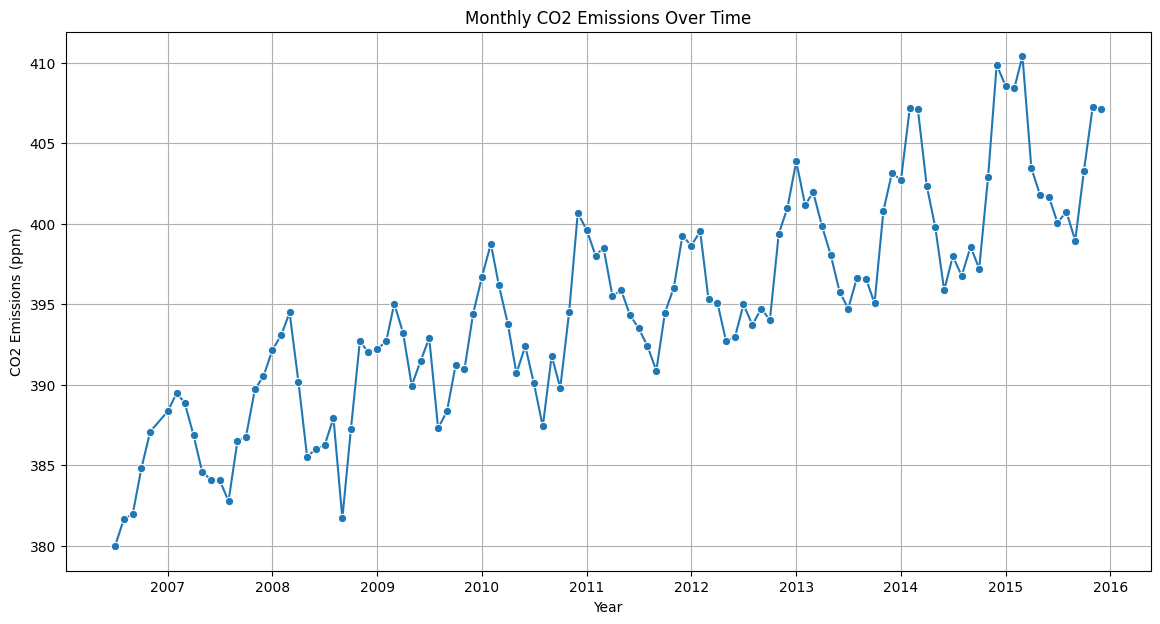

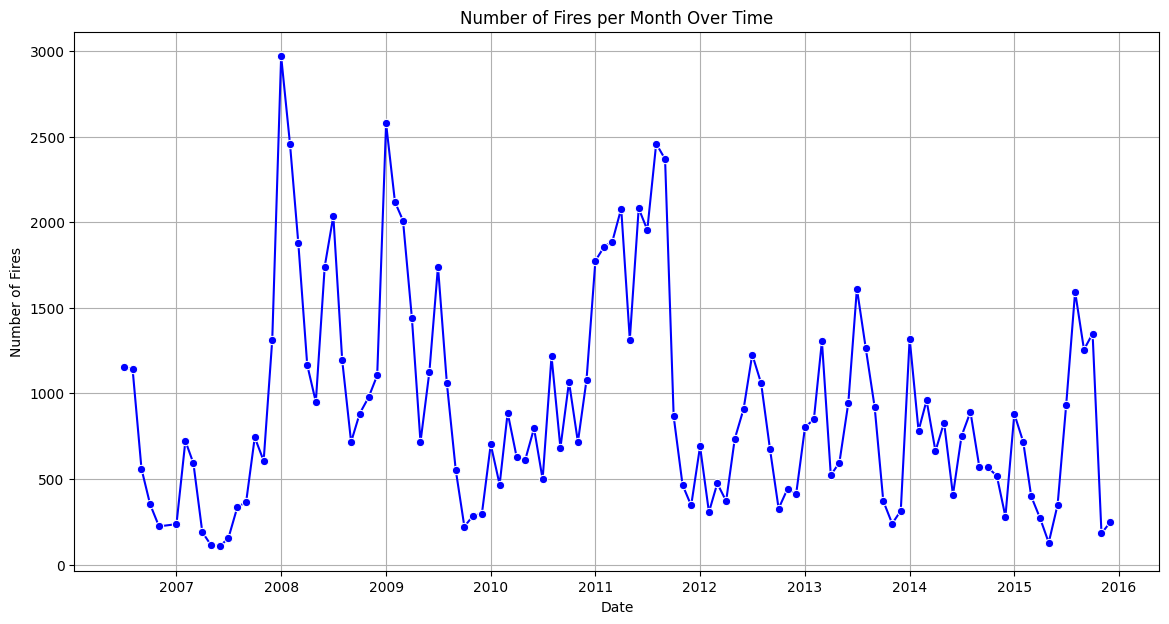

Pearson Correlation: -0.09 (p-value: 0.363)


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_16620\592676667.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


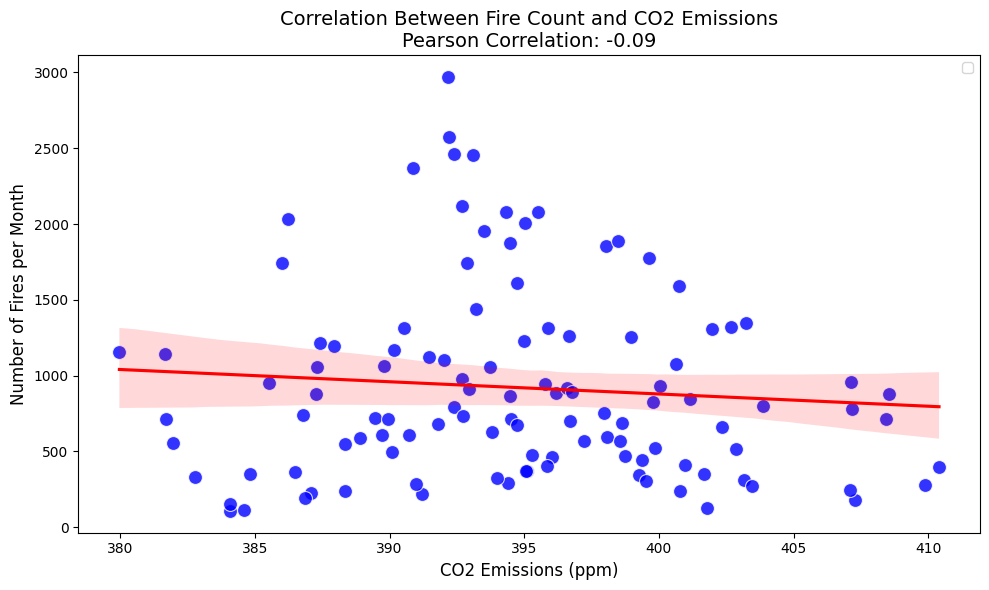

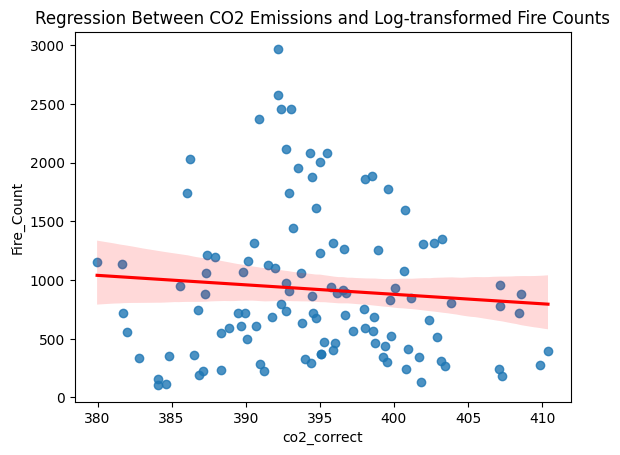

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

fire_data = texas_fires_with_drought_and_fips.copy()
co2_data = pd.read_csv('dataset/meanCO2_values.csv')
co2_data['date'] = pd.to_datetime(co2_data['year'].astype(str) + '-' + co2_data['month'].astype(str) + '-01')
co2_data = co2_data[co2_data['year'] <= 2015]

plt.figure(figsize=(14, 7))
sns.lineplot(data=co2_data, x='date', y='co2_correct', marker='o')
plt.title('Monthly CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (ppm)')
plt.grid(True)
plt.show()

fire_data['DISCOVERY_DATE_NEW'] = pd.to_datetime(fire_data['DISCOVERY_DATE_NEW'])
fire_data['Year'] = fire_data['DISCOVERY_DATE_NEW'].dt.year
fire_data['Month'] = fire_data['DISCOVERY_DATE_NEW'].dt.month

monthly_fires = fire_data.groupby(['Year', 'Month']).size().reset_index(name='Fire_Count')

monthly_fires['date'] = pd.to_datetime(monthly_fires['Year'].astype(str) + '-' + monthly_fires['Month'].astype(str) + '-01')

monthly_data = pd.merge(monthly_fires, co2_data[['date', 'co2_correct']], on='date')

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_data, x='date', y='Fire_Count', marker='o', color='blue')
plt.title('Number of Fires per Month Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fires')
plt.grid(True)
plt.show()

corr, p_value = pearsonr(monthly_data['co2_correct'], monthly_data['Fire_Count'])
print(f"Pearson Correlation: {corr:.2f} (p-value: {p_value:.3f})")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=monthly_data, x='co2_correct', y='Fire_Count', s=100, color='blue', alpha=0.8)

sns.regplot(data=monthly_data, x='co2_correct', y='Fire_Count', scatter=False, color='red', line_kws={"label": "Trend Line"})
plt.title(f'Correlation Between Fire Count and CO2 Emissions\nPearson Correlation: {corr:.2f}', fontsize=14)
plt.xlabel('CO2 Emissions (ppm)', fontsize=12)
plt.ylabel('Number of Fires per Month', fontsize=12)
plt.tight_layout()
plt.show()

monthly_data['Fire_Count'] = monthly_data['Fire_Count']

sns.regplot(data=monthly_data, x='co2_correct', y='Fire_Count', scatter=True, line_kws={"color": "red"})
plt.title('Regression Between CO2 Emissions and Log-transformed Fire Counts')
plt.show()


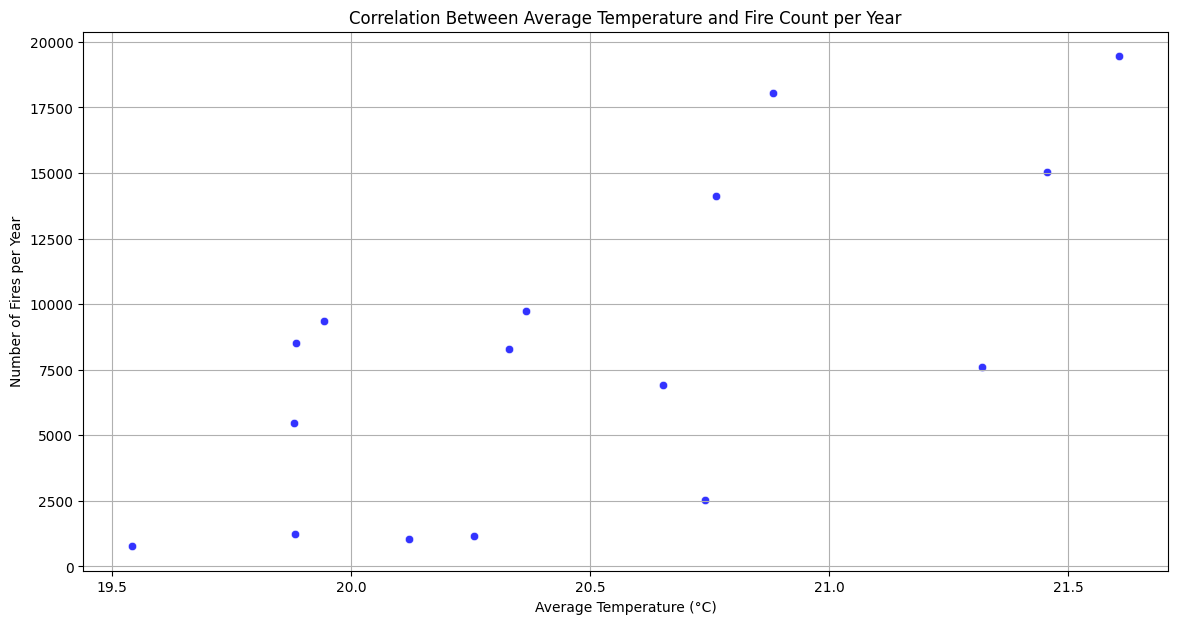

Pearson Correlation: 0.69 (p-value: 0.003)


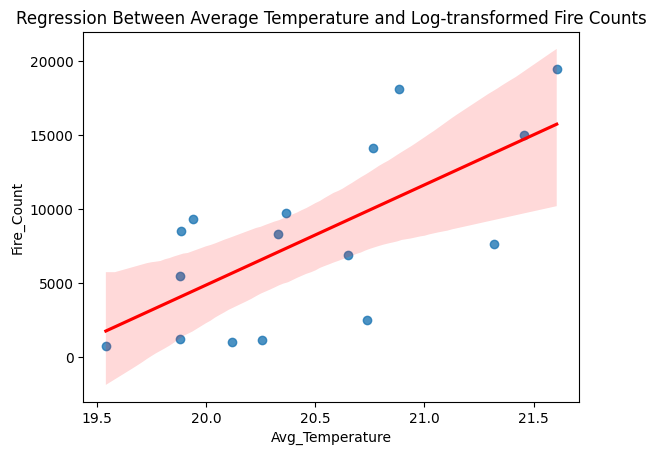

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

weather_data = pd.read_csv('dataset/cleaned_texas_weather_data_metric2.csv')
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
fire_data = texas_fires_with_drought_and_fips.copy()
fire_data['DISCOVERY_DATE_NEW'] = pd.to_datetime(fire_data['DISCOVERY_DATE_NEW'])
weather_data['Year'] = weather_data['datetime'].dt.year
fire_data['Year'] = fire_data['DISCOVERY_DATE_NEW'].dt.year

yearly_fires = fire_data.groupby('Year').size().reset_index(name='Fire_Count')
yearly_weather = weather_data.groupby('Year')['temp'].mean().reset_index(name='Avg_Temperature')
yearly_data = pd.merge(yearly_fires, yearly_weather, on='Year')

plt.figure(figsize=(14, 7))
sns.scatterplot(data=yearly_data, x='Avg_Temperature', y='Fire_Count', color='blue', alpha=0.8)
plt.title('Correlation Between Average Temperature and Fire Count per Year')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Number of Fires per Year')
plt.grid(True)
plt.show()

corr, p_value = pearsonr(yearly_data['Avg_Temperature'], yearly_data['Fire_Count'])
print(f"Pearson Correlation: {corr:.2f} (p-value: {p_value:.3f})")

yearly_data['Fire_Count'] = yearly_data['Fire_Count']

sns.regplot(data=yearly_data, x='Avg_Temperature', y='Fire_Count', scatter=True, line_kws={"color": "red"})
plt.title('Regression Between Average Temperature and Log-transformed Fire Counts')
plt.show()


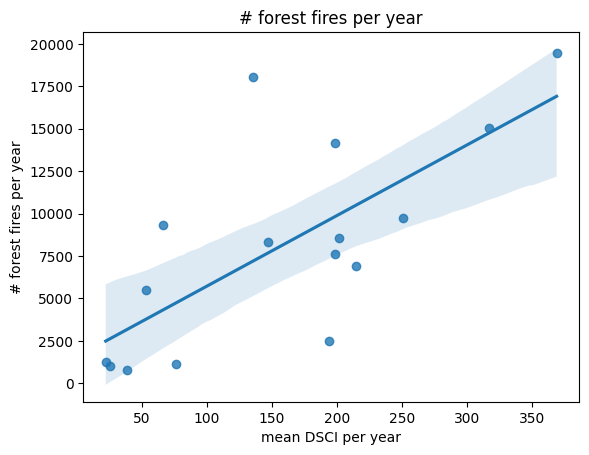

PearsonRResult(statistic=np.float64(0.7172461478712067), pvalue=np.float64(0.0017628885339218245))


In [80]:
#correlations of count forestfires with drought
df_state = pd.read_csv("dataset/drought_state_tx.csv")
df_fires = pd.read_csv("dataset/texas_fires_drought.csv")

df_fires["year"] = df_fires["DISCOVERY_DATE_NEW"].astype(str).str.slice(0,4)
df1 = df_fires.groupby("year")["DSCI"].agg(["count", "mean"])
sns.regplot(data = df1, x = "mean" , y = "count")
plt.xlabel("mean DSCI per year")
plt.ylabel("# forest fires per year")
plt.title("# forest fires per year")
plt.show()
print(sc.pearsonr(df1["mean"], df1["count"]))

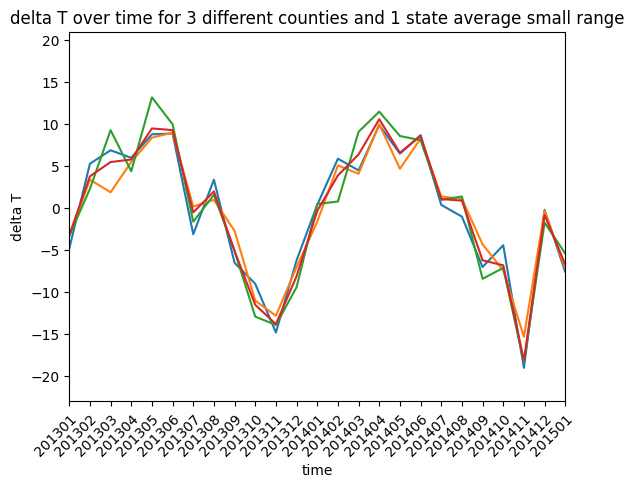

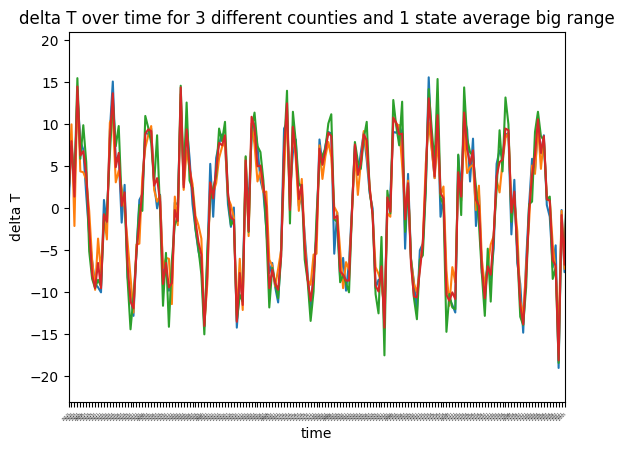

In [81]:
#checking wether temperature difference is the same over entire state

#reading fires csv
df_fire = pd.read_csv("dataset/texas_fires_drought.csv")

#reading drought csv and creating new columns for eacht year, day and month 
df_drought = pd.read_csv("dataset/drought_county_tx.csv")
df_drought["MapDate"] = df_drought["MapDate"].astype(str)
df_drought["year"] = df_drought["MapDate"].str.slice(0, 4)
df_drought["month"] = df_drought["MapDate"].str.slice(4,6) # the date values are now string!!!
df_drought["day"] = df_drought["MapDate"].str.slice(6,8)

# creating df of average TX and three seperated counties within texas
df_texas = pd.read_csv("dataset/texas_meanT.csv", header = 4)
df_pecos = pd.read_csv("dataset/pecos_meanT.csv", header = 4)
df_harris = pd.read_csv("dataset/harris_meanT.csv", header = 4)
df_floyd = pd.read_csv("dataset/floyd_meanT.csv", header = 4)

#creating delta T df's
df_texas["delta"] = df_texas["Value"].diff()
df_pecos["delta"] = df_pecos["Value"].diff()
df_harris["delta"] = df_harris["Value"].diff()
df_floyd["delta"] = df_floyd["Value"].diff()

df_pecos["Date"] =  df_pecos["Date"].astype(str)
df_harris["Date"] =  df_harris["Date"].astype(str)
df_floyd["Date"] =  df_floyd["Date"].astype(str)
df_texas["Date"] =  df_texas["Date"].astype(str)

#plotting each
plt.plot(df_texas["Date"], df_pecos["delta"])
plt.plot(df_texas["Date"], df_harris["delta"])
plt.plot(df_texas["Date"], df_floyd["delta"])
plt.plot(df_texas["Date"], df_texas["delta"])

plt.title("delta T over time for 3 different counties and 1 state average small range")
plt.xlabel("time")
plt.xticks(df_texas["Date"], labels=df_texas["Date"], rotation=45, rotation_mode="anchor", ha="right", size = 10)
plt.xlim("201301", "201501")
plt.ylabel("delta T")
plt.show()


#plotting again but zoomed out
plt.plot(df_texas["Date"], df_pecos["delta"])
plt.plot(df_texas["Date"], df_harris["delta"])
plt.plot(df_texas["Date"], df_floyd["delta"])
plt.plot(df_texas["Date"], df_texas["delta"])

plt.title("delta T over time for 3 different counties and 1 state average big range")
plt.xlabel("time")
plt.xticks(df_texas["Date"], labels=df_texas["Date"], rotation=45, rotation_mode="anchor", ha="right", size = 2)
plt.xlim("200101", "201501")
plt.ylabel("delta T")
plt.show()